# Demo of Coreference Resolution Model Test

First we define the model, that we want to test. For this demo it will be _XLM-R Coref_ - mainly becasue this is the only existing Danish coref model to our knowledge.

In [1]:
!bash coref_setup.sh

PREFIX=/work/miniconda3
Unpacking payload ...
                                                                                
Installing base environment...



Preparing transaction: done
Executing transaction: done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /work/miniconda3


In [2]:
!eval "$(/work/miniconda3/bin/conda shell.bash hook)"
!conda install -c conda-forge jsonnet -y
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download da_core_news_sm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



# All requested packages already installed.

  Using cached spacy-3.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached thinc-8.1.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (913 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.3
    Uninstalling spacy-3.3.3:
      Successfully uninstalled spacy-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [3]:
!pip install -r coref_requirements.txt 

  Using cached spacy-3.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.3 MB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.10
    Uninstalling thinc-8.1.10:
      Successfully uninstalled thinc-8.1.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.3
    Uninstalling spacy-3.5.3:
      Successfully uninstalled spacy-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
da-core-news-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.3.3 which is incompatible.


In [4]:
model_name = "xlm-r coref"
from danlp.models import load_xlmr_coref_model
model = load_xlmr_coref_model() 

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Use coarse to fine: True


## WinoBias Coreference Task

In [5]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# import the evaluator
from genda_lens.genda_lens import Evaluator
eval = Evaluator(model_name= model_name)

[INFO] You can test xlm-r coref by running Evaluator.evaluate_<model type>()


In [6]:
output = eval.evaluate_coref(test= "dawinobias", model = model)

[nltk_data] Downloading package omw-1.4 to /home/ucloud/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/opt/conda/lib/python3.10/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'da_core_news_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.3.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[INFO] Running the DaWinobias coreference task on xlm-r coref


100% |########################################################################|
100% |########################################################################|


[INFO] Output generated.


In [7]:
# save output in two variables
condensed_output, detailed_output = output[0], output[1]
detailed_output

Detailed Output for xlm-r coref,,DaWinoBias,,
Gender Effect Size,,-0.16,,
Condition,Anti-stereotypical,,Pro-stereotypical,
Accuracy,0.57,,0.51,
Pronouns,Female,Male,Female,Male
F1,0.51,0.62,0.4,0.59


In [9]:
#get the visualizer
from genda_lens.genda_lens import Visualizer
viz = Visualizer()

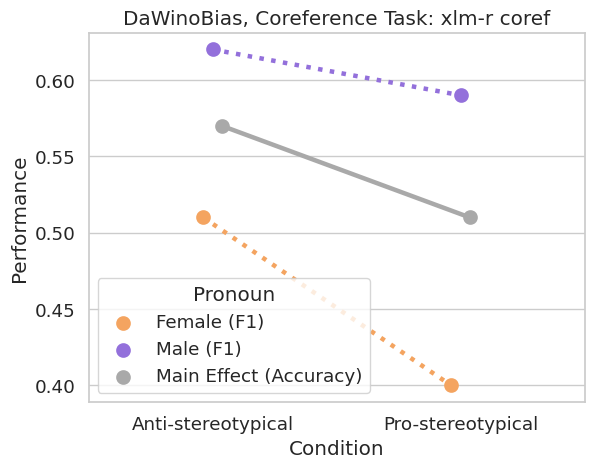

In [11]:
plot_wino = viz.visualize_results(detailed_output, 
                                  framework ="dawinobias", 
                                  model_name = model_name, 
                                  task = "coref")


## ABC Coreference Task

Since we have already specified model name and the evaluator class and the visualizer, we can just go ahead. 

In [13]:
output_abc = eval.evaluate_coref(test="abc", model = model)

[INFO] Running the ABC coreference task on xlm-r coref


100% |########################################################################|


[INFO] Output generated.


In [14]:
simple_output, detailed_output = output_abc[0], output_abc[1]
detailed_output

Detailed Output for xlm-r coref,,,ABC,,,
Gender Effect Size,,,0.03,,,
Pronoun,,Female,,Male,,Reflexive
Mean Rate of Detected Clusters,,0.88114,,0.902193,,0.966886
Stereotypical Occupation,Female,Male,Female,Male,Female,Male
Rate of Detected Clusters,0.93114,0.83114,0.884211,0.920175,0.967544,0.966228


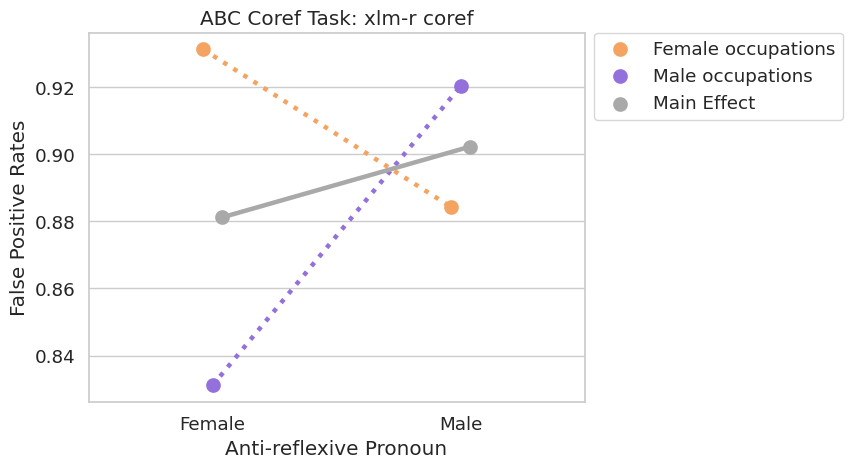

In [16]:
plot_abc = viz.visualize_results(detailed_output, framework ="abc", model_name = model_name, task = "coref")
plot_abc.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)